In [11]:
%matplotlib notebook

In [4]:
run_hive(
    """
    select cohort, (sum(if(2nd_month_edits >= 1, 1, 0)) / sum(if(1st_month_edits >= 1, 1, 0))) as retention_rate, count(*) as total_new
    from neilpquinn.new_editors
    group by cohort
    """
)

,cohort,retention_rate,total_new
0,2015-01,0.060257,123555
1,2015-02,0.053000,123038
2,2015-03,0.054421,130353
3,2015-04,0.053975,109273
4,2015-05,0.049421,110642
5,2015-06,0.053698,104491
6,2015-07,0.056306,95070
7,2015-08,0.065431,94634
8,2015-09,0.065665,101074
9,2015-10,0.059487,104745


In [ ]:
query_db(
    """
    select
        wiki,
        (sum(if(2nd_month_edits >= 1, 1, 0)) / count(*)) as retention_rate
    from neilpquinn.new_editors
    where
    1st_month_edits >= 1 and
    cohort >= "2016-08" and
    cohort < "2017-08" and
    wiki in (
        "enwiki", "commonswiki", "wikidatawiki", "dewiki",
        "frwiki", "jawiki", "eswiki", "ruwiki",
        "itwiki", "zhwiki", "ptwiki", "plwiki"
    )
    group by wiki
    """,
    db = "hadoop"
)

In [ ]:
query_db(
    """
    select
        wiki,
        (sum(if(2nd_month_edits >= 1, 1, 0)) / count(*)) as retention_rate
    from neilpquinn.new_editors
    where 
    cohort >= "2016-08" and
    cohort < "2017-08" and
    wiki = "cswiki"
    group by wiki
    """,
    db = "hadoop"
)

In [ ]:
# Global, long-term average
query_db(
    """
    select
        (sum(if(2nd_month_edits >= 1, 1, 0)) / count(*)) as retention_rate
    from neilpquinn.new_editors
    where 
    cohort >= "2016-08" and
    cohort < "2017-08"
    """,
    db = "hadoop"
)

In [ ]:
query_db(
    """
    select
        wiki,
        (sum(if(2nd_month_edits >= 25, 1, 0)) / count(*)) as retention_rate
    from neilpquinn.new_editors
    where
    1st_month_edits >= 25 and
    cohort >= "2016-08" and
    cohort < "2017-08" and
    wiki in (
        "enwiki", "commonswiki", "wikidatawiki", "dewiki",
        "frwiki", "jawiki", "eswiki", "ruwiki",
        "itwiki", "zhwiki", "ptwiki", "plwiki"
    )
    group by wiki
    order by retention_rate desc
    limit 100
    """,
    db = "hadoop"
)

In [1]:
run_hive(
    """
    select 
        cohort, 
        (sum(if(2nd_month_edits >= 5, 1, 0)) / sum(if(1st_month_edits >= 5, 1, 0))) as retention_rate, 
        sum(if(1st_month_edits >= 5, 1, 0)) as new_actives
    from neilpquinn.new_editors
    group by cohort
    """
)

,cohort,retention_rate,new_actives
0,2015-01,0.122971,27974
1,2015-02,0.104170,26476
2,2015-03,0.108131,29011
3,2015-04,0.105038,25067
4,2015-05,0.091663,26423
5,2015-06,0.101132,24285
6,2015-07,0.102467,22817
7,2015-08,0.147253,22132
8,2015-09,0.133197,24032
9,2015-10,0.119695,23493


In [3]:
new_active_retention = _

<IPython.core.display.Javascript object>


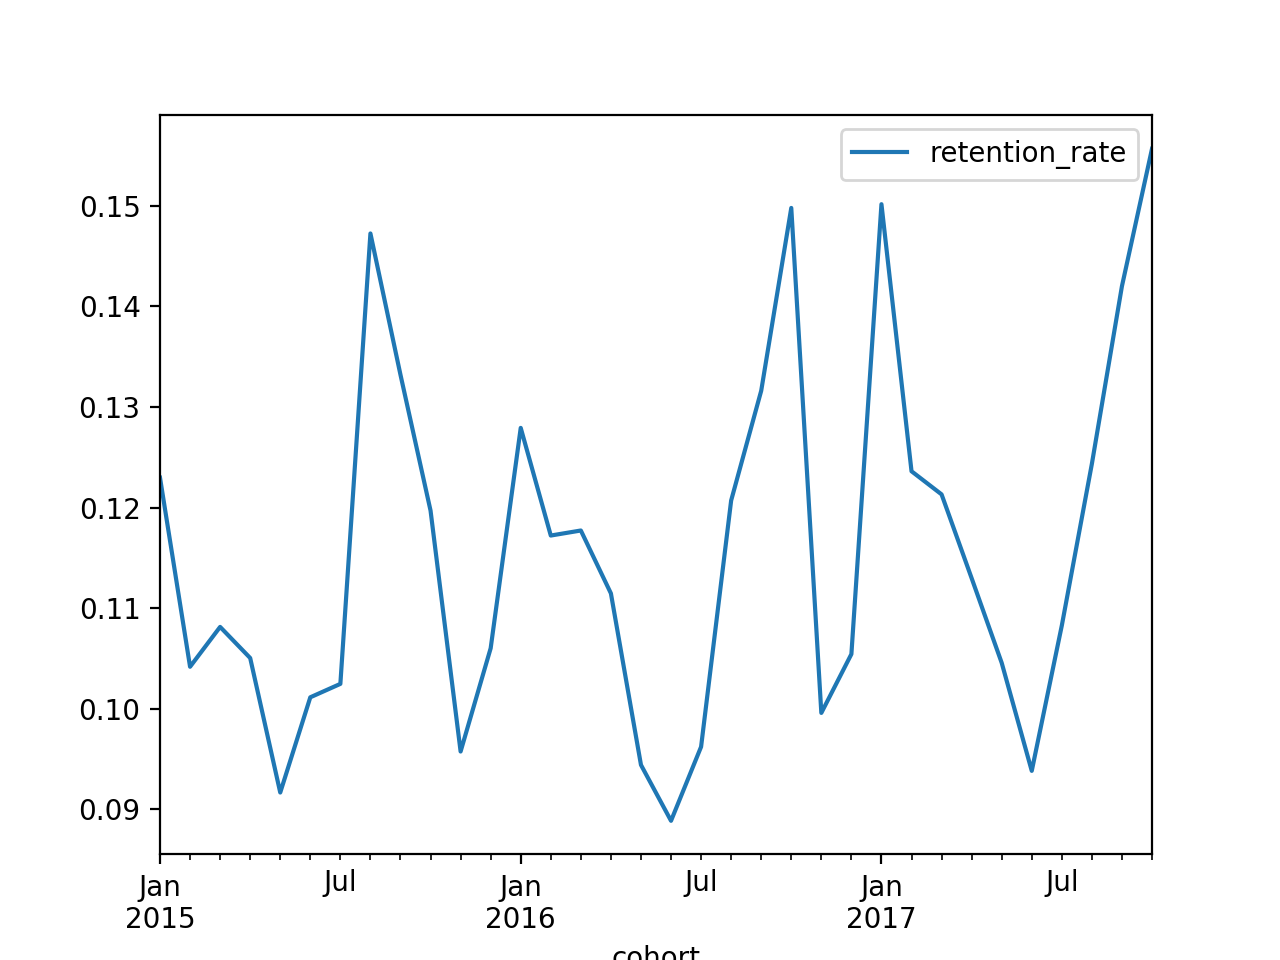

In [12]:
new_active_retention.iloc[:, :2].set_index(pd.DatetimeIndex(new_active_retention["cohort"])).drop("cohort", axis = 1).plot()